In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from scipy.stats import norm

import pandas_datareader as pdr
plt.style.use("ggplot")

In [58]:
tickers = ['FREY']
port_len = len(tickers)
price_data = []

start = '2019-11-07'
end = '2022-11-07'

for stock in tickers:
  stock_data = pdr.get_data_yahoo(stock, start, end)
  price_data.append(stock_data.Close)


stock_df = pd.concat(price_data, axis = 1)
stock_df.columns = tickers

In [75]:
returns = stock_df.pct_change()
mean_returns = returns.mean()
#covariance of one stock is just variance
cov = returns.cov()
weights = np.random.random(len(mean_returns))

Text(0.5, 1.0, 'Holding Period Returns of FREY')

<Figure size 1440x720 with 0 Axes>

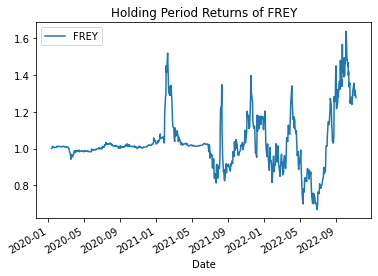

In [67]:
hpr = (stock_df.pct_change() + 1).cumprod()
plt.figure(figsize=(20, 10))

hpr.plot()
plt.legend(tickers)
plt.title("Holding Period Returns of FREY")

In [61]:
er = hpr.iloc[-1]
price = price_data[-1].iloc[-1]
price

12.539999961853027

In [76]:
mean_returns = np.array(mean_returns)
cov = cov.iloc[-1][0]
cov

0.0012379503091400736

Text(0.5, 1.0, "Monte Carlo Variance Simulation for ['FREY']")

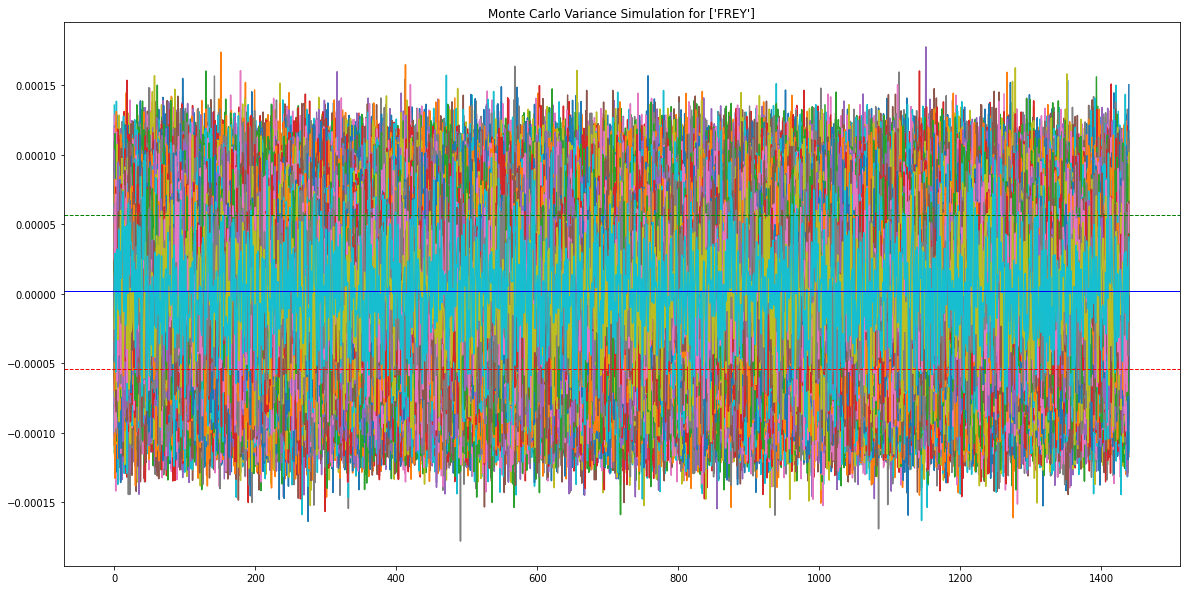

In [63]:
time = 1440

plt.figure(figsize = (20, 10))
returns_list = []

for i in range(10000): 
  # random.normal: (mean, std, number of samples drawn)
  daily_return = np.random.normal(mean_returns/time, cov/math.sqrt(time), time)
  returns_list.append(daily_return)
  plt.plot(daily_return)

plt.axhline(np.percentile(daily_return, 5), color = 'r', linestyle = 'dashed', linewidth = 1)
plt.axhline(np.percentile(daily_return, 95), color = 'g', linestyle = 'dashed', linewidth = 1)
plt.axhline(np.mean(daily_return), color = 'b', linestyle = 'solid', linewidth = 1)
plt.title("Monte Carlo Variance Simulation for FREY")

In [64]:
returns = np.array([r for ret in returns_list for r in ret])
returns

array([ 8.31017740e-07, -4.11674329e-05, -3.81442134e-05, ...,
        1.93022952e-05, -1.99469651e-05,  4.08410999e-05])

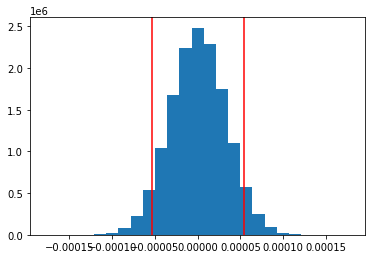

Fifth percentile is: -5.3010123956225054e-05 
Ninety-fifth percentile is: 5.431885677883389e-05


In [65]:
returns_fifth = np.percentile(returns, 5)
returns_ninetyfifth = np.percentile(returns, 95)
plt.hist(returns, bins = 25)
plt.axvline(returns_fifth, color = 'r')
plt.axvline(returns_ninetyfifth, color = 'r')
plt.show()
print("Fifth percentile is: " + str(returns_fifth), "\nNinety-fifth percentile is: " + \
str(returns_ninetyfifth))

In [85]:
daily_return = daily_return*100

Fifth percentile is: -0.005400019042664672 
Ninety-fifth percentile is: 0.005693499015298706


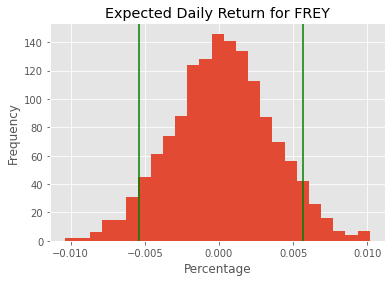

In [86]:
daily_return_fifth = np.percentile(daily_return, 5)
daily_return_ninetyfifth = np.percentile(daily_return, 95)
plt.title("Expected Daily Return for FREY")
plt.hist(daily_return, bins = 25)
plt.axvline(daily_return_fifth, color = 'g')
plt.axvline(daily_return_ninetyfifth, color = 'g')
plt.ylabel("Frequency")
plt.xlabel("Percentage")
print("Fifth percentile is: " + str(daily_return_fifth), "\nNinety-fifth percentile is: " + \
str(daily_return_ninetyfifth))